In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from scipy.optimize import curve_fit 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
df=pd.read_csv("C:/Users/I_am_AlexX/Downloads/afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria (2).csv")

In [7]:
df.head()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"


In [8]:
df.tail()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
18709,18710,Suburbano,L1,Lunes,2021-06-28,NaN,NaN,NaN
18710,18711,Suburbano,L1,Martes,2021-06-29,NaN,NaN,NaN
18711,18712,Suburbano,L1,Miércoles,2021-06-30,NaN,NaN,NaN
18712,18713,Suburbano,L1,Jueves,2021-07-01,NaN,NaN,NaN
18713,18714,Suburbano,L1,Viernes,2021-07-02,NaN,NaN,NaN


In [9]:
df.dtypes

id                             int64
organismo                     object
linea_servicio                object
dia                           object
fecha                         object
afluencia_tarjeta             object
afluencia_boleto              object
afluencia_total_preliminar    object
dtype: object

In [10]:
 df['afluencia_total_preliminar'] = df['afluencia_total_preliminar'].fillna("0,")

In [11]:
df.tail()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
18709,18710,Suburbano,L1,Lunes,2021-06-28,NaN,NaN,"0,"
18710,18711,Suburbano,L1,Martes,2021-06-29,NaN,NaN,"0,"
18711,18712,Suburbano,L1,Miércoles,2021-06-30,NaN,NaN,"0,"
18712,18713,Suburbano,L1,Jueves,2021-07-01,NaN,NaN,"0,"
18713,18714,Suburbano,L1,Viernes,2021-07-02,NaN,NaN,"0,"


In [12]:
df.organismo.unique()

array(['Ecobici', 'Metrobús', 'RTP', 'STC', 'STE-Cablebús',
       'STE-Tren Ligero', 'STE-Trolebús', 'Suburbano'], dtype=object)

In [13]:
df1=df[0:2000]

In [14]:
df2=[]
for index, row in df1.iterrows():
    row2=row['afluencia_total_preliminar'].replace(',', '')
    df2.append(row2)

In [15]:
len(df2)

2000

In [16]:
int(df2[1])

29475

In [17]:
ints = [int(item) for item in df2]
print(ints[488])

0


In [18]:
#print(ints)

In [19]:
df1

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"
...,...,...,...,...,...,...,...,...
1995,1996,Metrobús,L2,Viernes,2020-10-02,NaN,NaN,"103,551"
1996,1997,Metrobús,L3,Viernes,2020-10-02,NaN,NaN,"92,317"
1997,1998,Metrobús,L4,Viernes,2020-10-02,NaN,NaN,"45,804"
1998,1999,Metrobús,L5,Viernes,2020-10-02,NaN,NaN,"111,032"


[Text(0.5, 0, 'delegación'), Text(0, 0.5, 'número de registros')]

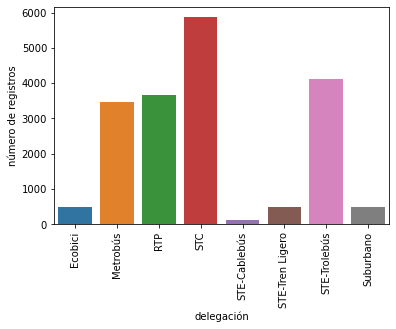

In [20]:
plt.xticks(rotation=90)
casos_por_del=sns.countplot(x='organismo',data=df)
casos_por_del.set(xlabel='delegación', ylabel='número de registros')

# Filtro por tipo de organismo (Ecobici)

Analizaremos primero aquellos datos que tengan a ecobici dentro del campo de organismo

In [21]:
in_ecobici = df['organismo'] == "Ecobici"

Con el siguiente comando creamos un nuevo data set cuyos elementos solo contendrán aquellos cuya columna "organismo" sea igual a "ecobici"

In [22]:
afluencia_ecobici = df[in_ecobici]

In [23]:
afluencia_ecobici.shape

(489, 8)

Con lo anterior vemos que este subconjunto de datos tiene solo 489 registros de afluencia

In [24]:
afluencia_ecobici.head(100)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"
5,6,Ecobici,NaN,Viernes,2020-03-06,NaN,NaN,"29,035"
6,7,Ecobici,NaN,Sábado,2020-03-07,NaN,NaN,"12,800"
7,8,Ecobici,NaN,Domingo,2020-03-08,NaN,NaN,"11,911"
8,9,Ecobici,NaN,Lunes,2020-03-09,NaN,NaN,"23,154"
9,10,Ecobici,NaN,Martes,2020-03-10,NaN,NaN,"31,211"


Dibujemos ahora un scatter plot que nos muestra según el id que posean la afluencia total correpondiente a ese día(id)

<AxesSubplot:xlabel='id', ylabel='afluencia_total_preliminar'>

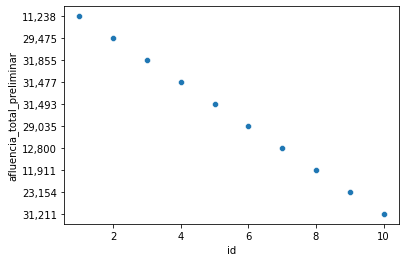

In [25]:
sns.scatterplot(data=afluencia_ecobici[0:10], x="id", y="afluencia_total_preliminar")

En la gráfica anterior observamos algo raro, se grafica una recta y los valores en el eje de las ordenadas no tienen un valor lógico pues no van en orden ascendente ni descendente, esto es porque los calores de la columna "afluencia_total_preliminar" no son números sino datos de tipo string como se puede corroborar con el siguiente comando.

In [26]:
type(afluencia_ecobici["afluencia_total_preliminar"][0]) # Solo nos hemos fijado en el primer elemento, pero todos 
#los demás tienen esta característica 

str

Así que debemos encontrar una forma para convertir esos datos de tipo "string" en datos de tipo "int" o "entero". Antes de hacer eso será conveniente ejecutar el siguiente comando:

In [27]:
afluencia_ecobici['afluencia_total_preliminar'] = afluencia_ecobici['afluencia_total_preliminar'].fillna("0,")

<ipython-input-27-fbfae2008eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_ecobici['afluencia_total_preliminar'] = afluencia_ecobici['afluencia_total_preliminar'].fillna("0,")


Con lo anterior lo único que hemos hecho es sustituit los valores "NAN" (Not a number) por el string "0,". Esto será conveniento hacerlo de este modo como se explicará más adelante. Lo que haremos con el bucle siguiente es eliminar las "," dentro de los valores de la columna "afluencia_total_preliminar" ya que ese formato en el que se encuentra dificulta el transformarlo a un valor entero.

In [28]:
af_1=[]
for index, row in afluencia_ecobici.iterrows():
    row2=row['afluencia_total_preliminar'].replace(',', '')
    af_1.append(row2)

In [29]:
#af_1

In [30]:
# Quite el "#"  de la línea anterior y ejecutela para observar que ahora los números no tienen la coma ",".

Ahora simplemente transformamos todos esos valores a enteros con el siguiente bucle for:

In [31]:
afl_eco_int = [int(item) for item in af_1]


Finalmente solo queda comparar la columna 'afluencia_total_preliminar' y agregar los valores que hemos obtenido ya convertidos a enteros. Así podremos contrastar ambas columnas:

In [32]:
#afluencia_ecobici.drop(['afluencia_total_preliminar'], axis=1)

Y ahora agregamos la nueva lista al data set:

In [33]:
afluencia_ecobici= afluencia_ecobici.assign(afluencia_total_preliminar_1=afl_eco_int)


In [34]:
afluencia_ecobici.head()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238",11238
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475",29475
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855",31855
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477",31477
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493",31493


Ahora sí podemos intentar hacer nuevamente la gráfica tipo scatter y ver qué pasa:

<AxesSubplot:xlabel='id', ylabel='afluencia_total_preliminar_1'>

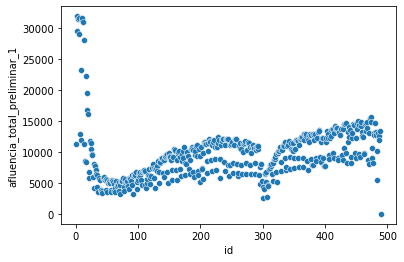

In [35]:
sns.scatterplot(data=afluencia_ecobici, x="id", y="afluencia_total_preliminar_1")

In [36]:
afluencia_ecobici.tail()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
484,485,Ecobici,NaN,Lunes,2021-06-28,NaN,NaN,"13,028",13028
485,486,Ecobici,NaN,Martes,2021-06-29,NaN,NaN,"12,499",12499
486,487,Ecobici,NaN,Miércoles,2021-06-30,NaN,NaN,"11,876",11876
487,488,Ecobici,NaN,Jueves,2021-07-01,NaN,NaN,"13,353",13353
488,489,Ecobici,NaN,Viernes,2021-07-02,NaN,NaN,"0,",0


Observando el head y tail del data set podemos observar que los datos abarcan desde la fecha Domingo 2020-03-01 al Viernes	2021-07-02

En cuanto a la base de datos "Covid-19 SINAVE Ciudad de México", Base del Sistema Nacional de Vigilancia Epidemiologica para el seguimiento a posibles casos de COVID-19 en la Ciudad de México, los datos se actualizan diariamente por lo que se podrán comparar ambas bases de datos sin ningun problema. Esta base de datos puede descargarse de https://datos.cdmx.gob.mx/dataset/base-covid-sinave

En la gráfica anterior sería interesante observar si el aumento en la afluencia total que se puede ver a partir más o menos del id 50 esta relacionado con la fecha en que comenzó la jornada nacional de vacunación contra covid. Esto es fácil de hacer pues la fecha en que inició dicha jornada fue el  12 de enero de 2021. Para dibujar esa línea divisoria bastará con identificar el id correspondiente a esa fecha, eso lo logramos con el siguiente comando:

In [37]:
in_2021_01_12 = afluencia_ecobici['fecha'] == "2021-01-12"


In [38]:
afluencia_ecobici[in_2021_01_12]

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
317,318,Ecobici,NaN,Martes,2021-01-12,NaN,NaN,"8,805",8805


Se dibuja la misma gráfica de dispersión pero ahora con la línea vertical que demarca el inicio de la jornada de vacunación, poniendo de maniefisto al menos que el segundo incremento en la afluencia evidente en el gráfico, está relacionado al menos en principio con el inicio de las jornadas de vacunación. Ahora, es interesante observar que 

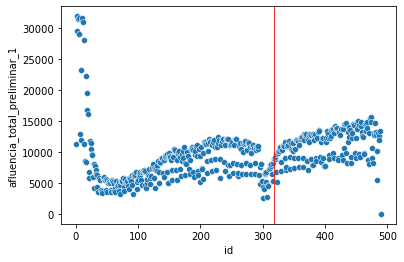

In [39]:
sns.scatterplot(data=afluencia_ecobici, x="id", y="afluencia_total_preliminar_1")
plt.axvline(318, 0,1,c="r", linewidth="0.8")

# Filtro por tipo de organismo (Metrobus)

Realizaremos un procedimiento análogo al explicado en la sección anterior pero ahora haciendo un filtro sólo para datos del Mexibus

In [40]:
in_metrobus = df['organismo'] == "Metrobús"

In [41]:
afluencia_metrobus = df[in_metrobus]

In [42]:
afluencia_metrobus.shape

(3461, 8)

<AxesSubplot:xlabel='id', ylabel='afluencia_total_preliminar'>

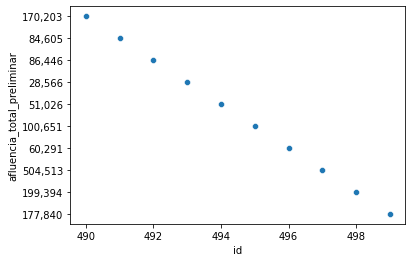

In [43]:
sns.scatterplot(data=afluencia_metrobus[0:10], x="id", y="afluencia_total_preliminar")

Vemos que tenemos exactamente el mismo problema con la visualización de datos que en el caso de "ecobici". Así que reralizamos el mismo procedimiento de limpieza de datos.

In [44]:
afluencia_metrobus['afluencia_total_preliminar'] = afluencia_metrobus['afluencia_total_preliminar'].fillna("0,")

<ipython-input-44-50f96c239b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_metrobus['afluencia_total_preliminar'] = afluencia_metrobus['afluencia_total_preliminar'].fillna("0,")


In [45]:
af_2=[]
for index, row in afluencia_metrobus.iterrows():
    row2=row['afluencia_total_preliminar'].replace(',', '')
    af_2.append(row2)

In [46]:
afl_met_bus_int = [int(item) for item in af_2]


In [47]:
afluencia_metrobus= afluencia_metrobus.assign(afluencia_total_preliminar_1=afl_met_bus_int)

In [48]:
afluencia_metrobus.head()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
489,490,Metrobús,L1,Domingo,2020-03-01,NaN,NaN,"170,203",170203
490,491,Metrobús,L2,Domingo,2020-03-01,NaN,NaN,"84,605",84605
491,492,Metrobús,L3,Domingo,2020-03-01,NaN,NaN,"86,446",86446
492,493,Metrobús,L4,Domingo,2020-03-01,NaN,NaN,"28,566",28566
493,494,Metrobús,L5,Domingo,2020-03-01,NaN,NaN,"51,026",51026


<AxesSubplot:xlabel='id', ylabel='afluencia_total_preliminar_1'>

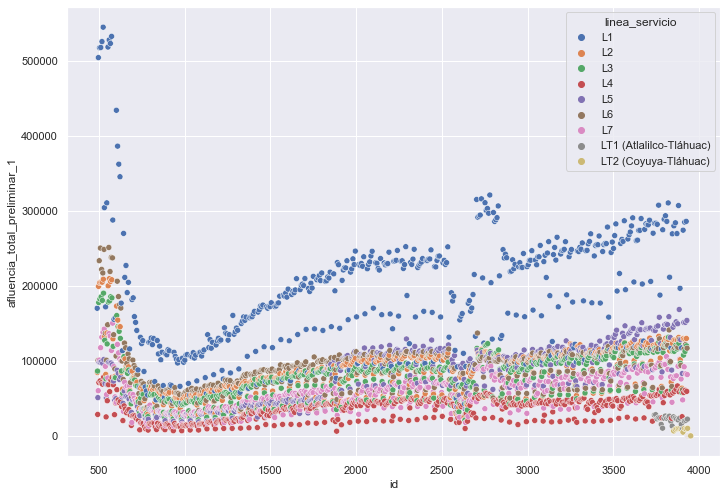

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_metrobus, x="id", y="afluencia_total_preliminar_1",hue= afluencia_metrobus.linea_servicio)

Nuevamente buscamos la fecha de inicio de la jornada de vacunación y veremos si existe un incremento considerable en la afluencia total a partir de esa fecha

In [50]:
in_2021_01_12 = afluencia_metrobus['fecha'] == "2021-01-12"


In [51]:
afluencia_metrobus[in_2021_01_12]

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
2708,2709,Metrobús,L1,Martes,2021-01-12,NaN,NaN,"291,631",291631
2709,2710,Metrobús,L2,Martes,2021-01-12,NaN,NaN,"110,024",110024
2710,2711,Metrobús,L3,Martes,2021-01-12,NaN,NaN,"103,421",103421
2711,2712,Metrobús,L4,Martes,2021-01-12,NaN,NaN,"50,091",50091
2712,2713,Metrobús,L5,Martes,2021-01-12,NaN,NaN,"109,353",109353
2713,2714,Metrobús,L6,Martes,2021-01-12,NaN,NaN,"102,804",102804
2714,2715,Metrobús,L7,Martes,2021-01-12,NaN,NaN,"90,940",90940


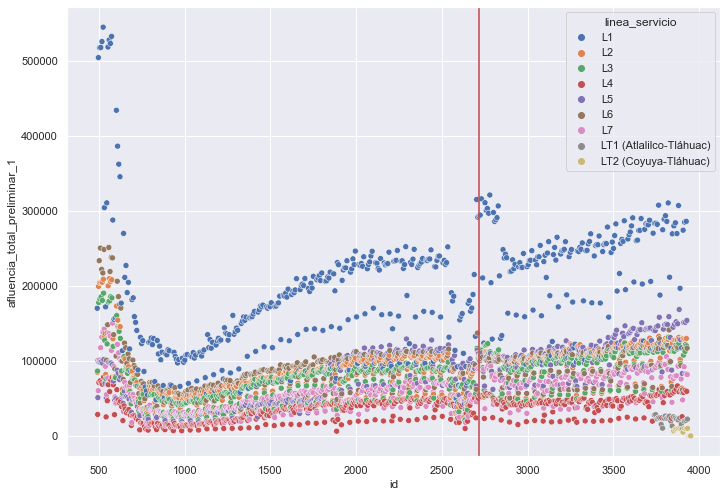

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_metrobus, x="id", y="afluencia_total_preliminar_1",hue= afluencia_metrobus.linea_servicio)
plt.axvline(2709, 0,1,c="r", linewidth="0.8")
plt.axvline(2715, 0,1,c="r", linewidth="0.8")

Es evidente el claro dominio de la "línea 1" sobre las demás líneas de metrobús en cuanto al aumento de afluencia a partir del inicio de la jornada nacional de vacunación. En cuanto al comportamiento de las demás, más bien parece mantenerse más o menos constante, por lo que al momento de hacer modelos predictivos se pondrá especial atención en los datos referentes a la línea 1 del metrobús.

# Filtro por tipo de organismo (RTP)

In [53]:
in_RTP = df['organismo'] == "RTP"

In [54]:
afluencia_RTP = df[in_RTP]

In [55]:
afluencia_RTP.shape

(3671, 8)

In [56]:
afluencia_RTP.head(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
3950,3951,RTP,Ordinario,Domingo,2020-03-01,51,"85,298","85,349"
3951,3952,RTP,Expreso,Domingo,2020-03-01,"1,537","42,745","44,282"
3952,3953,RTP,Atenea,Domingo,2020-03-01,NaN,"1,468","1,468"


In [57]:
afluencia_RTP.tail(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
7618,7619,RTP,Eco Atenea,Viernes,2021-07-02,NaN,NaN,"0,"
7619,7620,RTP,Expreso Directo,Viernes,2021-07-02,NaN,NaN,"0,"
7620,7621,RTP,SEFI Metro Línea 12,Viernes,2021-07-02,NaN,NaN,"0,"


In [55]:
afluencia_RTP['afluencia_total_preliminar'] = afluencia_RTP['afluencia_total_preliminar'].fillna("0,")

<ipython-input-55-e288b0beb366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_RTP['afluencia_total_preliminar'] = afluencia_RTP['afluencia_total_preliminar'].fillna("0,")


In [56]:
af_3=[]
for index, row in afluencia_RTP.iterrows():
    row3=row['afluencia_total_preliminar'].replace(',', '')
    af_3.append(row3)

In [57]:
afl_RTP_int = [int(item) for item in af_3]

In [58]:
afluencia_RTP= afluencia_RTP.assign(afluencia_total_preliminar_1=afl_RTP_int)

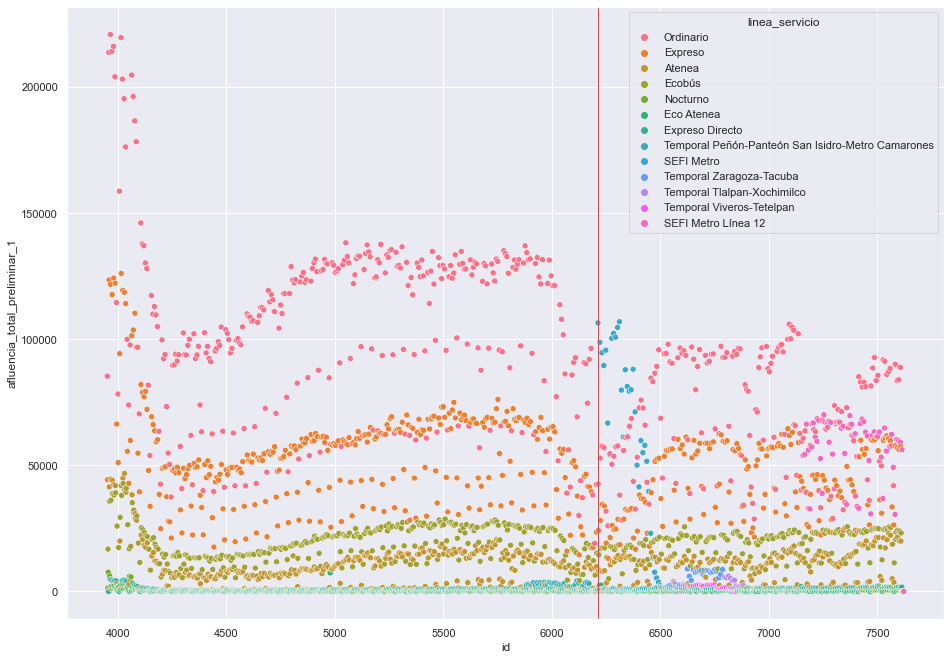

In [59]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_RTP, x="id", y="afluencia_total_preliminar_1",hue= afluencia_RTP.linea_servicio)
plt.axvline(6213, 0,1,c="r", linewidth="1")

In [60]:
in_2021_01_12 = afluencia_RTP['fecha'] == "2021-01-12"
afluencia_RTP[in_2021_01_12]

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
6212,6213,RTP,Ordinario,Martes,2021-01-12,"1,146","41,452","42,598",42598
6213,6214,RTP,Expreso,Martes,2021-01-12,"2,157","22,040","24,197",24197
6214,6215,RTP,Atenea,Martes,2021-01-12,NaN,"8,093","8,093",8093
6215,6216,RTP,Ecobús,Martes,2021-01-12,"1,567","12,963","14,530",14530
6216,6217,RTP,Nocturno,Martes,2021-01-12,4,265,269,269
6217,6218,RTP,Eco Atenea,Martes,2021-01-12,NaN,"2,441","2,441",2441
6218,6219,RTP,Expreso Directo,Martes,2021-01-12,102,801,903,903
6219,6220,RTP,Temporal Peñón-Panteón San Isidro-Metro Camarones,Martes,2021-01-12,57,498,555,555
6220,6221,RTP,SEFI Metro,Martes,2021-01-12,"2,714","96,061","98,775",98775


# Filtro por tipo de organismo (STC)

In [61]:
in_STC = df['organismo'] == "STC"

In [62]:
afluencia_STC = df[in_STC]

In [63]:
afluencia_STC.shape

(5868, 8)

In [64]:
afluencia_STC['afluencia_total_preliminar'] = afluencia_STC['afluencia_total_preliminar'].fillna("0,")

<ipython-input-64-42fb0e348405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_STC['afluencia_total_preliminar'] = afluencia_STC['afluencia_total_preliminar'].fillna("0,")


In [65]:
af_4=[]
for index, row in afluencia_STC.iterrows():
    row4=row['afluencia_total_preliminar'].replace(',', '')
    af_4.append(row4)

In [66]:
afl_STC_int = [int(item) for item in af_4]

In [67]:
afluencia_STC= afluencia_STC.assign(afluencia_total_preliminar_1=afl_STC_int)

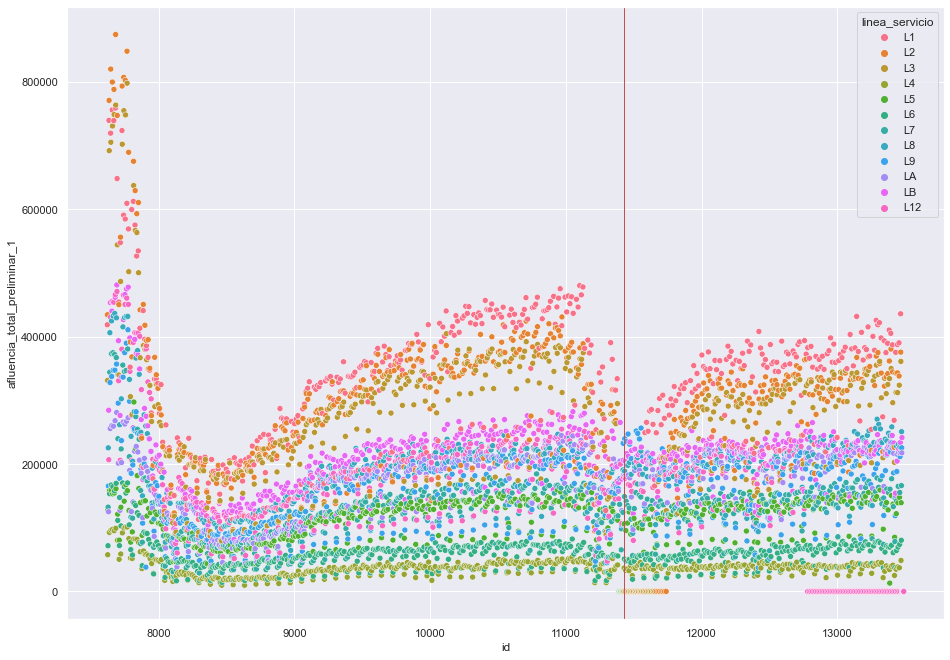

In [68]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC, x="id", y="afluencia_total_preliminar_1",hue= afluencia_STC.linea_servicio)
plt.axvline(11426, 0,1,c="r", linewidth="1")

In [69]:
in_2021_01_12 = afluencia_STC['fecha'] == "2021-01-12"
afluencia_STC[in_2021_01_12]

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
11425,11426,STC,L1,Martes,2021-01-12,NaN,NaN,0,0
11426,11427,STC,L2,Martes,2021-01-12,NaN,NaN,0,0
11427,11428,STC,L3,Martes,2021-01-12,NaN,NaN,0,0
11428,11429,STC,L4,Martes,2021-01-12,NaN,NaN,"36,710",36710
11429,11430,STC,L5,Martes,2021-01-12,NaN,NaN,"106,139",106139
11430,11431,STC,L6,Martes,2021-01-12,NaN,NaN,"50,926",50926
11431,11432,STC,L7,Martes,2021-01-12,NaN,NaN,"148,858",148858
11432,11433,STC,L8,Martes,2021-01-12,NaN,NaN,"188,818",188818
11433,11434,STC,L9,Martes,2021-01-12,NaN,NaN,"239,710",239710
11434,11435,STC,LA,Martes,2021-01-12,NaN,NaN,"181,153",181153


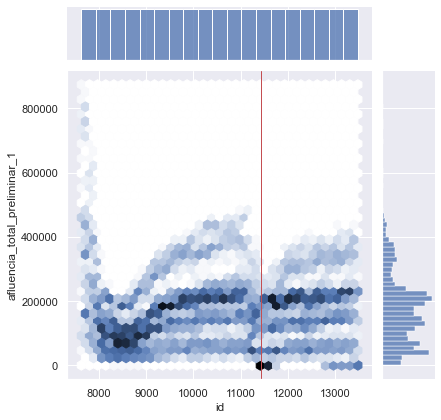

In [70]:
sns.set(rc={'figure.figsize':(17.7,14.27)}) #tamaño del gráfico
sns.jointplot(data=afluencia_STC, x="id", y="afluencia_total_preliminar_1",kind='hex')
plt.axvline(11426, 0,1,c="r", linewidth="1")

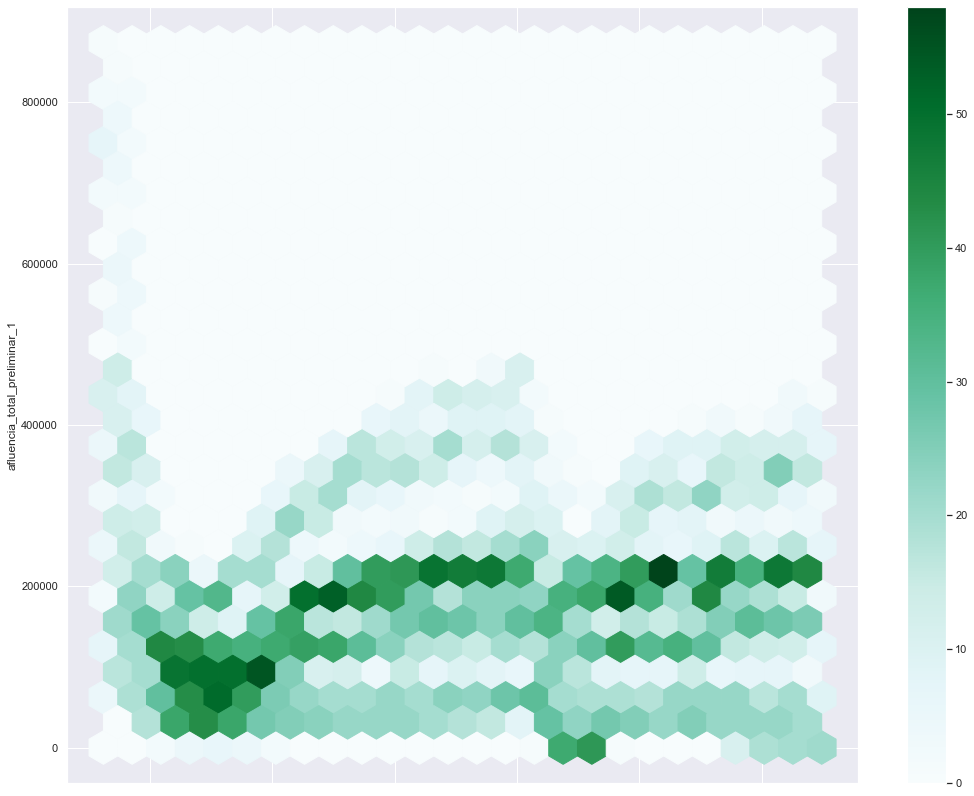

In [71]:
afluencia_STC.plot.hexbin(x='id',y='afluencia_total_preliminar_1',gridsize=25,cmap='');

Dado que son los datos relacionados con el "STC" los que más registros tienen según el primer histograma mostrado en este notebook, sería interesante desglosar el anterior gráfico para cada una de las líneas del metro.

### Filtro para la Linea 1 del metro

In [72]:
in_linea_1 = df['linea_servicio'] == "L1"

In [73]:
afluencia_STC_linea_1 = afluencia_STC[in_linea_1]

<ipython-input-73-e4f5be2748e5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_1 = afluencia_STC[in_linea_1]


In [74]:
afluencia_STC_linea_1.columns

Index(['id', 'organismo', 'linea_servicio', 'dia', 'fecha', 'afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total_preliminar', 'afluencia_total_preliminar_1'], dtype='object')

In [75]:
afluencia_STC_linea_1.shape

(489, 9)

In [76]:
afluencia_STC_linea_1

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
7621,7622,STC,L1,Domingo,2020-03-01,NaN,NaN,"418,638",418638
7633,7634,STC,L1,Lunes,2020-03-02,NaN,NaN,"739,516",739516
7645,7646,STC,L1,Martes,2020-03-03,NaN,NaN,"719,480",719480
7657,7658,STC,L1,Miércoles,2020-03-04,NaN,NaN,"755,872",755872
7669,7670,STC,L1,Jueves,2020-03-05,NaN,NaN,"739,258",739258
7681,7682,STC,L1,Viernes,2020-03-06,NaN,NaN,"758,938",758938
7693,7694,STC,L1,Sábado,2020-03-07,NaN,NaN,"648,204",648204
7705,7706,STC,L1,Domingo,2020-03-08,NaN,NaN,"454,374",454374
7717,7718,STC,L1,Lunes,2020-03-09,NaN,NaN,"547,619",547619
7729,7730,STC,L1,Martes,2020-03-10,NaN,NaN,"723,588",723588


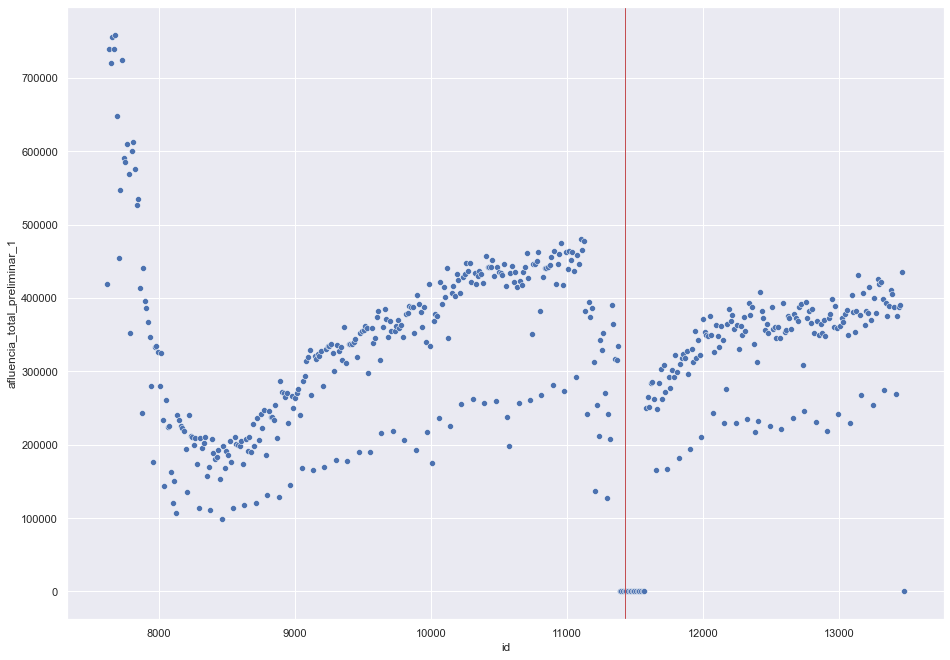

In [77]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_1, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

Son muy visibles los ceros que asignamos a los valores NAN(Not a number) en el data set original, en la base de la gráfica, dado que son minoría no representaría ningún problema eliminarlos, e inlcuso resulta prudente hacerlo para que al hacer ahora el modelo predictivo esos ceros no afecten negativamente al modelo, que es algo que nos interesaría saber; el cómo evolucionará esta tendencia en los meses próximos al menos, saber si es más probable que se mantenga estable o continue en aumento y saber la rapidez con la que se dará una u otra situación es determinante saberlo, pues a pesar de que la mayoría de la gente esté vacunada para entonces, habrá gente que preferirá manetener su movilidad a solo lo estrictamente necesario siendo un factor determinante para la reactivación económica, pues la movilidad siempre es una variable importante para el desarrollo económico de un país.

In [78]:
afluencia_STC_linea_1_sin_ceros = afluencia_STC_linea_1[afluencia_STC_linea_1.afluencia_total_preliminar_1 != 0]

In [79]:
afluencia_STC_linea_1_sin_ceros.shape

(472, 9)

Podemos ver exactamente cuál es la cantidad de ceros que eliminamos para hacer una comparación y corroborar que efectivamente no será significativo el no tener estos datos para realizar el modelo predictivo.

In [80]:
afluencia_STC_linea_1.shape[0]-afluencia_STC_linea_1_sin_ceros.shape[0]

17

La cantidad de ceros que eliminamos fue de 17 pero no solo eliminamos los ceros sino toda la fila correspondiente a este dato de afluencia total. Es por eso que es relevante hacer dicha mención.

Nuevamente volemos a dibujar la gráfica de dispersión, pero ahora sin los ceros de la anterior:

sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_1_sin_ceros, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

In [81]:
#sns.set(rc={'figure.figsize':(17.7,14.27)}) #tamaño del gráfico
#sns.jointplot(data=afluencia_STC_linea_1_sin_ceros, x="id", y="afluencia_total_preliminar_1",kind='hex')
#plt.axvline(11426, 0,1,c="r", linewidth="1")

Ahora sí podemos trabajar en el modelo predictivo con estos datos de la linea 1.

### Modelo predictivo para la línea 1

Intentaremos hacer un ajuste no lineal usando el método de los mínimos cuadrados no lineales para hacer un primer modelo predictivo.

Primero definimos la función con la que vamos a tratar de ajustar los datos de la linea 1. Para tal efecto usaremos la sentencia def de python:

In [82]:
#x = afluencia_STC_linea_1_sin_ceros["id"]

In [83]:
#y= afluencia_STC_linea_1_sin_ceros["afluencia_total_preliminar_1"]

### Función para dibujar el scatter plot de los datos de interés con su respectiva gráfica del mdoelo predictivo

In [88]:
# Parámetros de la función
# grado
#var_pred ---> valores de variable predictora
#var_resp ---> valores variable de respuesta

def dibujar_modelo_regresion_polinomial(grado,var_pred,var_resp):
    
    from sklearn.preprocessing import PolynomialFeatures
    lr=LinearRegression()

    poly=PolynomialFeatures(degree=grado)
    
    x_r=var_pred.values.reshape(-1,1)
    x_poly=poly.fit_transform(x_r)
    
    poly.fit(x_poly,var_resp)# creación del modelo
    
    model=lr.fit(x_poly,var_resp)
    y_pred=lr.predict(x_poly)
    
    a=plt.scatter(x_r,var_resp,color='b')
    b=plt.plot(var_pred,y_pred,color='r')
    
    # Print the Intercept:
    print('Ordenada al origen:', model.intercept_)

    # Print the Slope:
    print('Coeficientes del polinomio:', model.coef_) 
    
    r_sq = model.score(x_poly, var_resp)
    print('Valor de r^2:', r_sq)
    #y_pred = model.predict(x_poly)
    #print('Predicted response:', y_pred, sep='\n')
    
    return a,b
    

### Función para dividir data set en conjunto de entrenamiento(80 % del data set) y de prueba(20 % del data set).

In [102]:
def dividir_datos(data_set,var_predictora, var_respuesta):
    
    from sklearn.model_selection import train_test_split
    
    training_data, testing_data = train_test_split(data_set, test_size=0.2, random_state=25)
    
    X_train=training_data[var_predictora].values.reshape(-1,1)
    Y_train=training_data[var_respuesta]
    
    X_test= testing_data[var_predictora].values.reshape(-1,1)
    Y_test=testing_data[var_respuesta]
    
    return X_train,Y_train,X_test,Y_test

La siguiente función crea un modelo para dos conjuntos; de entrenamiento y de prueba. El tamaño de ambos conjuntos se determina por el parámetro **tamaño_conjunto_prueba** este debe asumir un valor de **0 < tamaño_conjunto_prueba < 1** claro que por la experiencia se sabe que el conjunto de entrenamiento debe ser de alrededor del **70 por ciento**. Para nuestro primer caso de la linea 1 del metro, se determinará un tamaño del conjunto de entrenamiento del 80 por ciento y por lo tanto de un 20 por ciento para el conjunto de prueba.

In [99]:


def crear_modelo_regresion_lineal_polinomica(data_set,var_predictora, var_respuesta, grado,tamaño_conjunto_prueba):
    
    #"Crea un modelo de regresión lineal para un grado de libertad dado"

    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    
    training_data, testing_data = train_test_split(data_set, test_size=tamaño_conjunto_prueba, random_state=25)
    
    X_train=training_data[var_predictora].values.reshape(-1,1)
    Y_train=training_data[var_respuesta]
    
    X_test= testing_data[var_predictora].values.reshape(-1,1)
    Y_test=testing_data[var_respuesta]  
    
    
    pf= PolynomialFeatures(degree=grado)
  
    # transforma las características existentes en características de mayor grado. .
    X_train_poly = pf.fit_transform(X_train)
  
   #ajustar las características transformadas a la regresión lineal 
    lr= LinearRegression()
    lr.fit(X_train_poly, Y_train)
  
  # prediciendo sobre el conjunto de datos de entrenamiento 
    y_train_predicted = lr.predict(X_train_poly)
  
  # prediciendo sobre el conjunto de datos de prueba 
    y_test_predict = lr.predict(pf.fit_transform(X_test))
  
  # evaluar el modelo en el conjunto de datos de entrenamiento 
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluar el modelo en el conjunto de datos de prueba
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
  
  #gráficas de los valores del data set comparados con la predicción del modelo
    
  #plt.scatter(X_train,Y_train,color='r',label="Conjunto de entrenamiento")
  #plt.scatter(X_test,Y_test,color='b',label="Conjunto de prueba")
  #plt.scatter(X_test,y_test_predict,color='m',label="Modelo predictivo")
  #plt.scatter(X_train,y_train_predicted,color='m') 
  #plt.legend(loc='upper right');
  #plt.show()

    print("Modelo desarrollado para el conjunto de entrenamiento")
    print("__________________________________________________________________________")
    print("El error cuadrático medio del conjunto de entrenamiento es {}".format(rmse_train))
    print("El coeficiente R2 del cojunto de entrenamiento es {}".format(r2_train))
  
    print("\n")
  
    print("Modelo desarrollado para el conjunto de prueba")
    print("__________________________________________________________________________")
    print("El error cuadrático medio del conjunto de prueba es {}".format(rmse_test))
    print("El coeficiente R2 del conjunto de prueba es {}".format(r2_test))

    print("Los coeficientes del polinomio son {}".format(lr.coef_))
    print("La ordenada al origen de la fución del modelo es {}".format(lr.intercept_))
    
    #print(X_train.shape,Y_train.shape)
    #print(X_train.shape,y_train_predicted.shape)
  
     #print(y_train_predicted)

Al contar ya con las funciones **dibujar_modelo_regresion_polinomial()** y **crear_modelo_regresion_lineal_polinomica()** podemos de manera sistemática contruir un modelo que nos permita predecir con cierta probabilidad de confianza cómo se comportará la "afluencia total" en la línea 1 del metro en los próximos meses. Así contruiremos primero el modelo y obtendremos el coeficiente de determinación o R^2m del modelo junto con los coeficientes de los polinomios y su ordenada al origen, con la cual podremos construir después una función con la cuál predecir dicho comportamiento de afluencia. 

Primero usamos **crear_modelo_regresion_lineal_polinomica()** para un polinomio de grado 6 :

In [100]:
crear_modelo_regresion_lineal_polinomica(afluencia_STC_linea_1_sin_ceros,"id","afluencia_total_preliminar_1",6,0.20)

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 88976.0688617361
El coeficiente R2 del cojunto de entrenamiento es 0.34736086953554157


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 77051.17665275175
El coeficiente R2 del conjunto de prueba es 0.3129859032842691
Los coeficientes del polinomio son [ 0.00000000e+00  2.08610824e-06 -4.23670141e-08 -1.64918402e-04
  3.49604705e-08 -2.60606483e-12  6.67646431e-17]
La ordenada al origen de la fución del modelo es 9490442.927882805


Ahora usamos  **dibujar_modelo_regresion_polinomial()** para dibujar la gráfica de dispersión de nuestros datos junto con la gráfica del modelo predictivo:

Ordenada al origen: 9180343.185492685
Coeficientes del polinomio: [ 0.00000000e+00  6.36899585e-07 -4.09429489e-08 -1.59457672e-04
  3.38020142e-08 -2.51944044e-12  6.45348769e-17]
Valor de r^2: 0.34314768179032484


(<matplotlib.collections.PathCollection at 0x22a77de5220>,
 [<matplotlib.lines.Line2D at 0x22a77de57c0>])

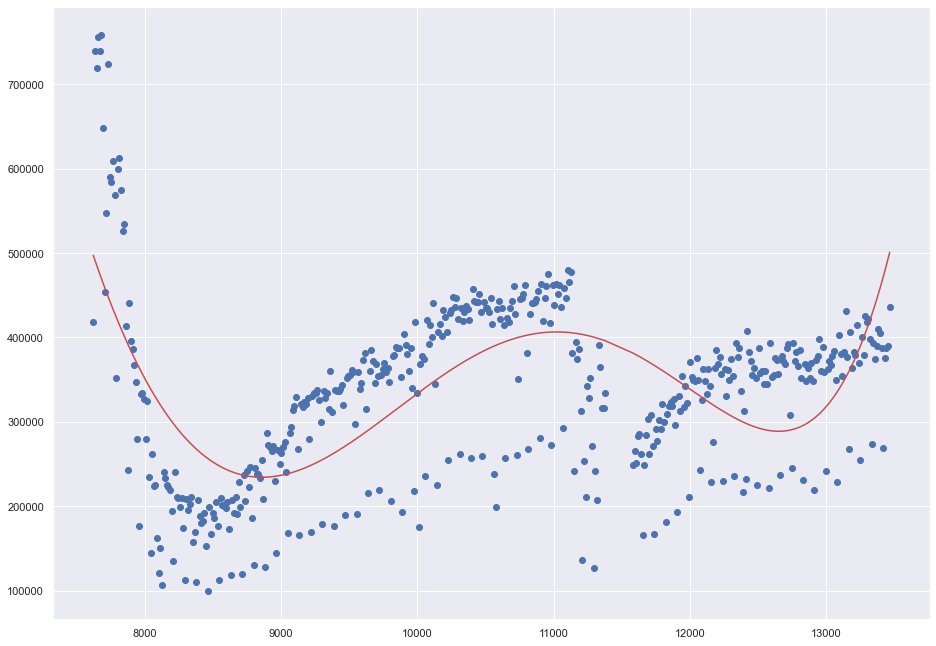

In [101]:
dibujar_modelo_regresion_polinomial(6,afluencia_STC_linea_1_sin_ceros["id"],afluencia_STC_linea_1_sin_ceros["afluencia_total_preliminar_1"])

Es importante notar que el valor de los coeficientes al usar la función **crear_modelo_regresion_lineal_polinomica()** y luego  **dibujar_modelo_regresion_polinomial()** son ligeramente distintos aunque en términos de orden de magnitud son iguales y esto se debe a que en la primera función se ha dividido el data set en conmjuntos de entrenamiento y de prueba, mientras que en la segunda función se usa el data set completo para hacer la predicción.

Ahora para extrapolar los valores que arroja el modelo predictivo será necesario primero darnos cuenta de que en el data set original de la línea 1 cada id está asociado a una fecha en específico. En particular vemos que existe siempre una diferencia de 12 en los id sucesivos (esto se debe a que en el data set original están las 12 líneas del metro registradas, pero recuérdese que nosotros hemos hecho un filtro solo para obtener las de la línea 12). De tal manera que para extrapolar a un año será necesario agregar un intervalo en el eje de las x de (365*12) (pensando que hay 365 días al año)

In [106]:
afluencia_STC_linea_1_sin_ceros.tail()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
13417,13418,STC,L1,Domingo,2021-06-27,NaN,NaN,"268,707",268707
13429,13430,STC,L1,Lunes,2021-06-28,NaN,NaN,"375,456",375456
13441,13442,STC,L1,Martes,2021-06-29,NaN,NaN,"387,585",387585
13453,13454,STC,L1,Miércoles,2021-06-30,NaN,NaN,"390,344",390344
13465,13466,STC,L1,Jueves,2021-07-01,NaN,NaN,"435,846",435846


In [241]:
afluencia_STC_linea_1_sin_ceros.head(1000)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
7621,7622,STC,L1,Domingo,2020-03-01,NaN,NaN,"418,638",418638
7633,7634,STC,L1,Lunes,2020-03-02,NaN,NaN,"739,516",739516
7645,7646,STC,L1,Martes,2020-03-03,NaN,NaN,"719,480",719480
7657,7658,STC,L1,Miércoles,2020-03-04,NaN,NaN,"755,872",755872
7669,7670,STC,L1,Jueves,2020-03-05,NaN,NaN,"739,258",739258
7681,7682,STC,L1,Viernes,2020-03-06,NaN,NaN,"758,938",758938
7693,7694,STC,L1,Sábado,2020-03-07,NaN,NaN,"648,204",648204
7705,7706,STC,L1,Domingo,2020-03-08,NaN,NaN,"454,374",454374
7717,7718,STC,L1,Lunes,2020-03-09,NaN,NaN,"547,619",547619
7729,7730,STC,L1,Martes,2020-03-10,NaN,NaN,"723,588",723588


Dibujamos la gráfica extrapolada a un año como:

In [331]:

# Función cuadrática.
def f10(x): 
    return 6.45348769*10**(-17)*x**6 - 2.51944044*10**-12*x**5+(3.38020142)*(10**(-8))*(x**4)-(1.59457672)*(10**(-4))*(x**3)-(4.09429489)*(10**(-8))*(x**2)+(6.36899585)*(10**(-7))*(x)+(9180343.185492685)


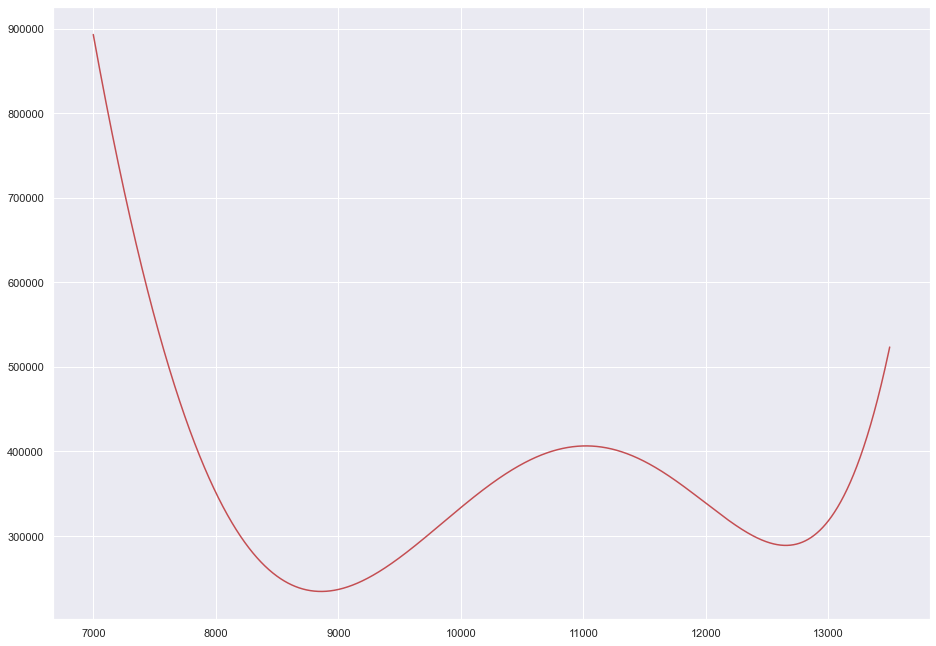

In [363]:
# 100 linearly spaced numbers
x = np.linspace(7000,13500,3000)

# the function, which is y = x^2 here
y = f10(x)
# setting the axes at the centre
fig = plt.figure()
#ax = fig.add_subplot(1000000, 10000000, 10000000)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')
#plt.ylim([1e6, 0])
# show the plot
plt.show()

Como resultado de que el estadístico r^2 sea del cerca del 30 por ciento obtenemos un modelo que crece demasiado rápido, como primer modelo es una buen punto de partida, sin embargo si queremos tener una mejor predicción sería muy útil si se pudiera acceder a una mayor cantidad de datos mejoraría, sin duda,  la predicción del modelo.

Veamos ahora si usando data sets de otras líneas podemos encontrar un r^2 ,más alto y por tanto un modelo predictivo más confiable.

### Modelo predictivo para la línea 2

In [371]:
in_linea_2 = df['linea_servicio'] == "L2"

In [372]:
afluencia_STC_linea_2 = afluencia_STC[in_linea_2]

<ipython-input-372-0e3ccf7cebcb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_2 = afluencia_STC[in_linea_2]


In [373]:
afluencia_STC_linea_2.columns

Index(['id', 'organismo', 'linea_servicio', 'dia', 'fecha', 'afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total_preliminar', 'afluencia_total_preliminar_1'], dtype='object')

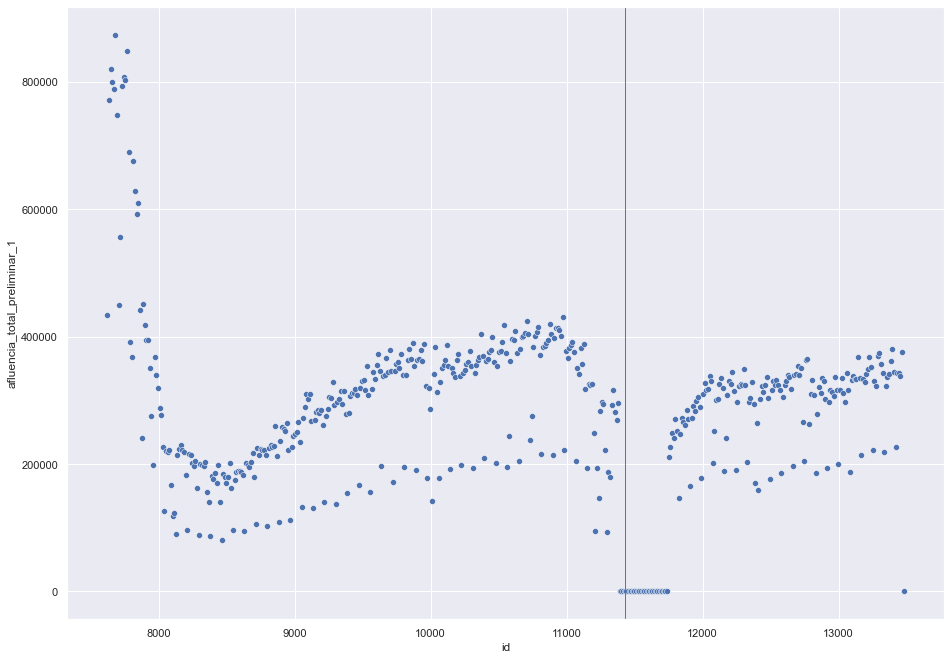

In [374]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_2, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

In [375]:
afluencia_STC_linea_2.shape

(489, 9)

In [376]:
afluencia_STC_linea_2_sin_ceros = afluencia_STC_linea_2[afluencia_STC_linea_2.afluencia_total_preliminar_1 != 0]

In [378]:
afluencia_STC_linea_2_sin_ceros.shape

(458, 9)

In [387]:
crear_modelo_regresion_lineal_polinomica(afluencia_STC_linea_2_sin_ceros,"id","afluencia_total_preliminar_1",6,0.35)

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 92219.15012987249
El coeficiente R2 del cojunto de entrenamiento es 0.3168060410232436


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 98749.05399568395
El coeficiente R2 del conjunto de prueba es 0.36717338447173975
Los coeficientes del polinomio son [ 0.00000000e+00 -1.32784363e-06 -4.09302124e-08 -1.59052683e-04
  3.35105018e-08 -2.48366260e-12  6.32821380e-17]
La ordenada al origen de la fución del modelo es 9331973.08841502


Ordenada al origen: 10017218.20775885
Coeficientes del polinomio: [ 0.00000000e+00 -1.08724027e-06 -4.37317797e-08 -1.70156742e-04
  3.58046535e-08 -2.65121133e-12  6.75081675e-17]
Valor de r^2: 0.3417344289612827


(<matplotlib.collections.PathCollection at 0x22a00358ee0>,
 [<matplotlib.lines.Line2D at 0x22a003588b0>])

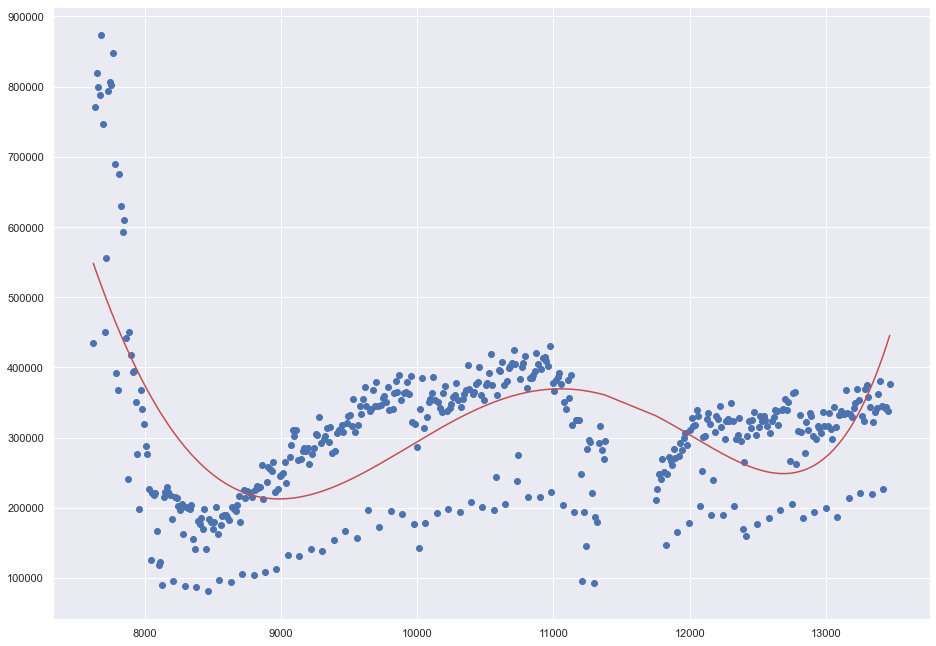

In [389]:
dibujar_modelo_regresion_polinomial(6,afluencia_STC_linea_2_sin_ceros["id"],afluencia_STC_linea_2_sin_ceros["afluencia_total_preliminar_1"])

### Modelo predictivo para la línea 3

In [390]:
in_linea_3 = df['linea_servicio'] == "L3"

In [391]:
afluencia_STC_linea_3 = afluencia_STC[in_linea_3]

<ipython-input-391-90ae28c037e3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_3 = afluencia_STC[in_linea_3]


In [392]:
afluencia_STC_linea_3.columns

Index(['id', 'organismo', 'linea_servicio', 'dia', 'fecha', 'afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total_preliminar', 'afluencia_total_preliminar_1'], dtype='object')

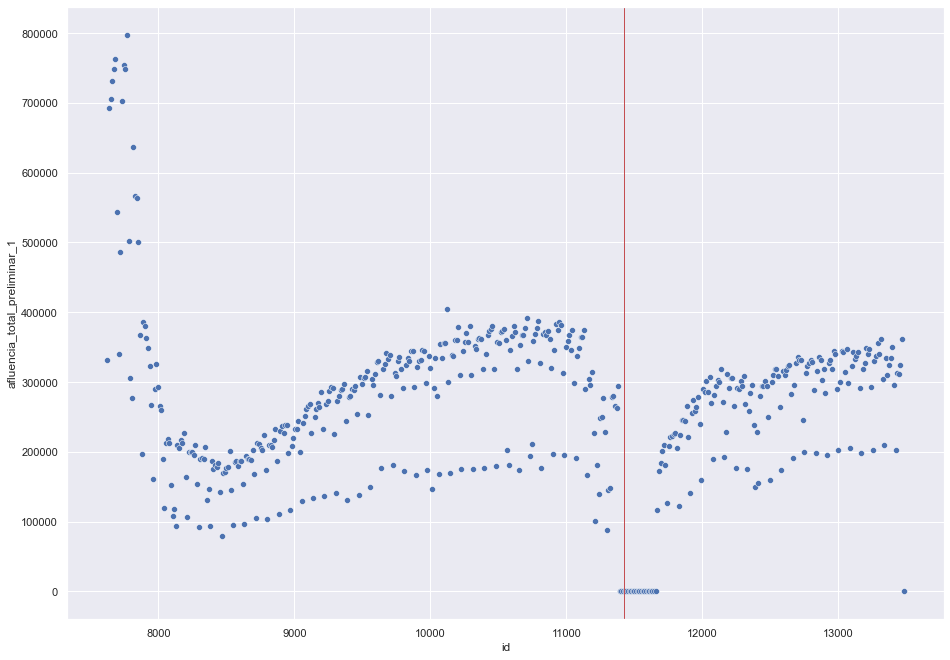

In [393]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_3, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

### Modelo predictivo para la línea 4

<ipython-input-394-1aee13fb4f56>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_4 = afluencia_STC[in_linea_4]


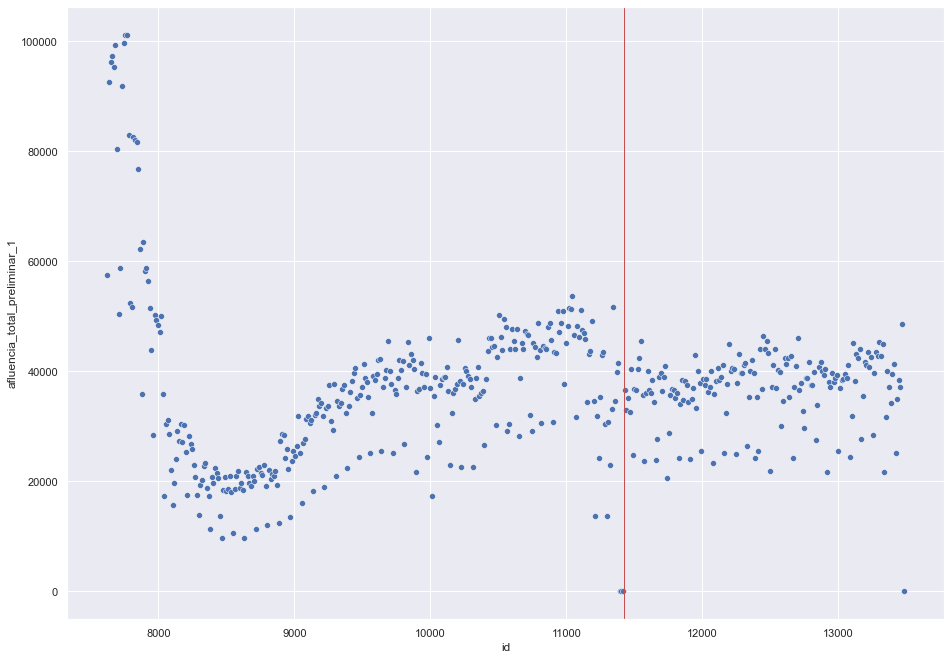

In [394]:
in_linea_4 = df['linea_servicio'] == "L4"
afluencia_STC_linea_4 = afluencia_STC[in_linea_4]
afluencia_STC_linea_4.columns
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_4, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

In [397]:
afluencia_STC_linea_4.shape

(489, 9)

In [401]:
afluencia_STC_linea_4_sin_ceros.shape

(485, 9)

In [412]:
afluencia_STC_linea_4_sin_ceros = afluencia_STC_linea_4[afluencia_STC_linea_4.afluencia_total_preliminar_1 != 0]
crear_modelo_regresion_lineal_polinomica(afluencia_STC_linea_4_sin_ceros,"id","afluencia_total_preliminar_1",6,0.2)

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 10572.791437908052
El coeficiente R2 del cojunto de entrenamiento es 0.4332964526479648


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 9412.90463088456
El coeficiente R2 del conjunto de prueba es 0.41552892737416114
Los coeficientes del polinomio son [ 0.00000000e+00  2.81111048e-08 -5.67208719e-09 -2.20802749e-05
  4.61873846e-09 -3.40006109e-13  8.60811752e-18]
La ordenada al origen de la fución del modelo es 1319134.5700928604


Ordenada al origen: 1289883.7002327712
Coeficientes del polinomio: [ 0.00000000e+00  4.29988831e-09 -5.51685934e-09 -2.15050000e-05
  4.49272469e-09 -3.30319533e-13  8.35299784e-18]
Valor de r^2: 0.43219367590069524


(<matplotlib.collections.PathCollection at 0x22a77f15e50>,
 [<matplotlib.lines.Line2D at 0x22a77e7bf40>])

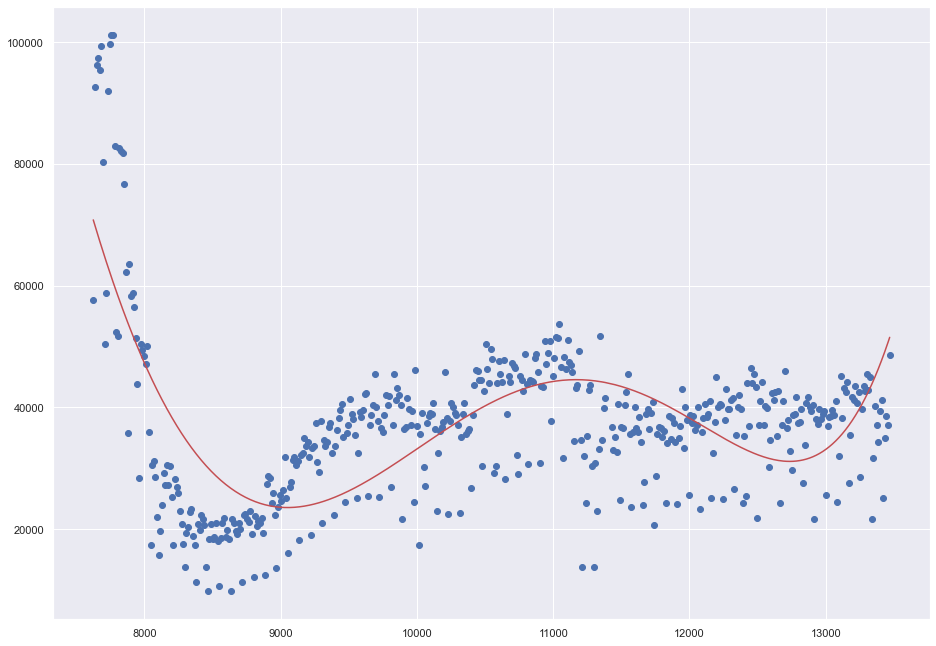

In [413]:
dibujar_modelo_regresion_polinomial(6,afluencia_STC_linea_4_sin_ceros["id"],afluencia_STC_linea_4_sin_ceros["afluencia_total_preliminar_1"])

### Modelo predictivo para la línea 5

<ipython-input-414-7fa5e6434256>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_5 = afluencia_STC[in_linea_5]


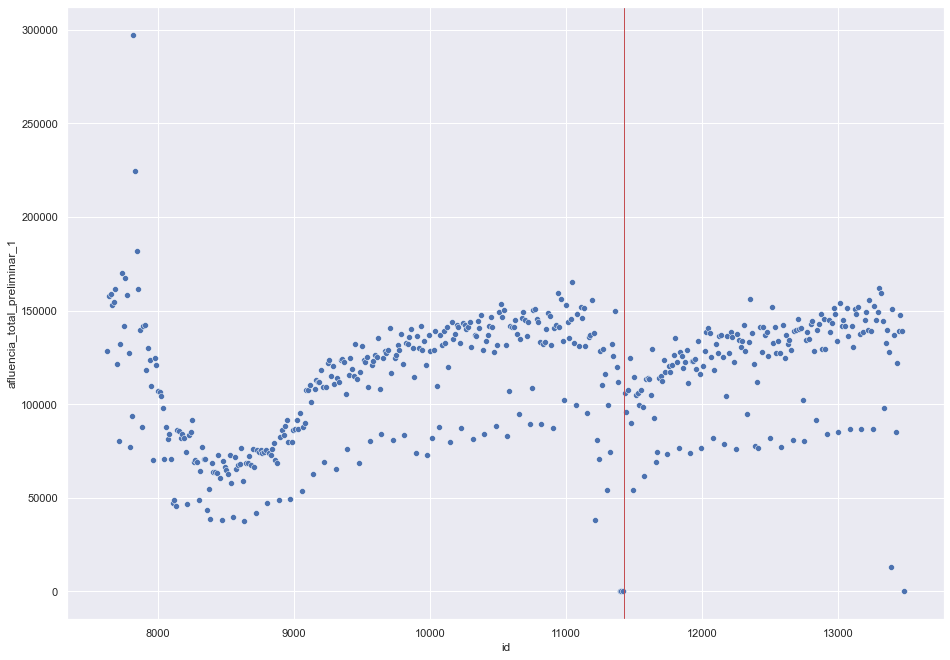

In [414]:
in_linea_5 = df['linea_servicio'] == "L5"
afluencia_STC_linea_5 = afluencia_STC[in_linea_5]
afluencia_STC_linea_5.columns
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_5, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

In [424]:
afluencia_STC_linea_5_sin_ceros = afluencia_STC_linea_5[afluencia_STC_linea_5.afluencia_total_preliminar_1 != 0]
crear_modelo_regresion_lineal_polinomica(afluencia_STC_linea_5_sin_ceros,"id","afluencia_total_preliminar_1",7,0.2)

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 28944.52248727076
El coeficiente R2 del cojunto de entrenamiento es 0.2035194293296747


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 24973.191222018704
El coeficiente R2 del conjunto de prueba es 0.360447877425653
Los coeficientes del polinomio son [ 0.00000000e+00 -3.18787614e-11  7.00112220e-16 -5.88127696e-13
 -2.05304691e-09  4.64082801e-13 -3.59734348e-17  9.45484226e-22]
La ordenada al origen de la fución del modelo es 753961.734565103


Ordenada al origen: 1845285.4911159852
Coeficientes del polinomio: [ 0.00000000e+00 -6.09248323e-08 -8.20840696e-09 -3.20062507e-05
  6.81419182e-09 -5.09492567e-13  1.30820300e-17]
Valor de r^2: 0.27096910512357697


(<matplotlib.collections.PathCollection at 0x22a78f65a00>,
 [<matplotlib.lines.Line2D at 0x22a78f65fa0>])

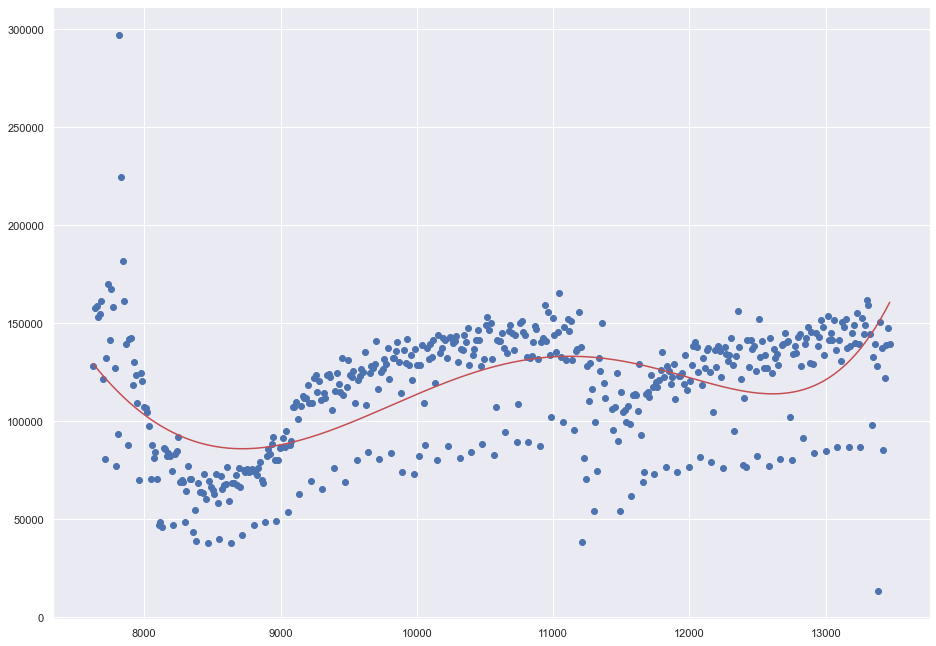

In [432]:
dibujar_modelo_regresion_polinomial(6,afluencia_STC_linea_5_sin_ceros["id"],afluencia_STC_linea_5_sin_ceros["afluencia_total_preliminar_1"])

### Modelo predictivo para la línea 6

<ipython-input-433-dfc1c5daa19b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_6 = afluencia_STC[in_linea_6]


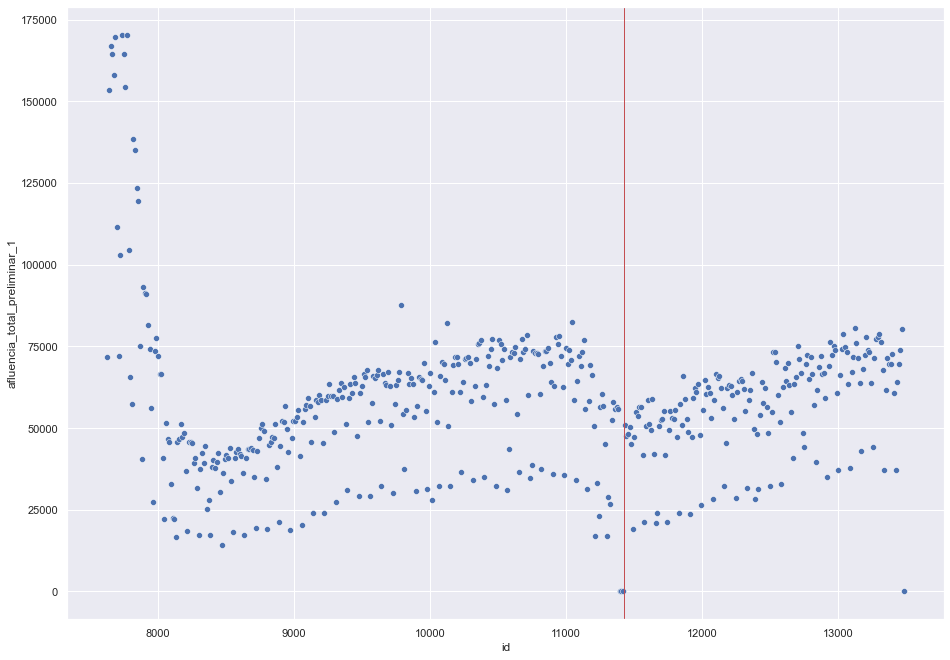

In [433]:
in_linea_6 = df['linea_servicio'] == "L6"
afluencia_STC_linea_6 = afluencia_STC[in_linea_6]
afluencia_STC_linea_6.columns
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_6, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

### Modelo predictivo para la línea 7

### Modelo predictivo para la línea 8

### Modelo predictivo para la línea 9

### Modelo predictivo para la línea A

<ipython-input-435-523293599e52>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_A = afluencia_STC[in_linea_A]


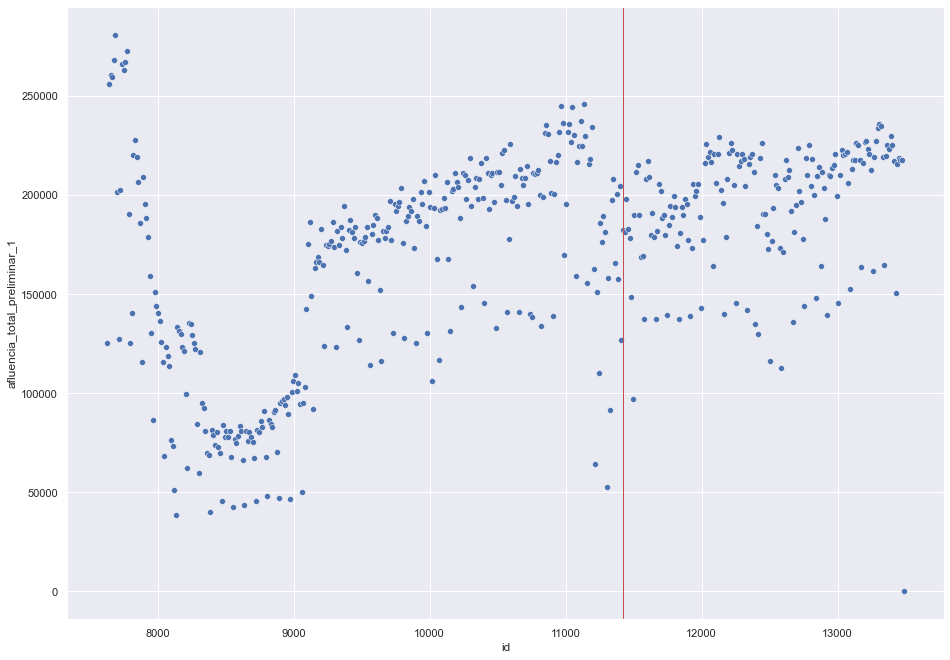

In [435]:
in_linea_A = df['linea_servicio'] == "LA"
afluencia_STC_linea_A = afluencia_STC[in_linea_A]
afluencia_STC_linea_A.columns
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_A, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")

### Modelo predictivo para la línea B

### Modelo predictivo para la línea 12

<ipython-input-436-d5bfb4577e5e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_12 = afluencia_STC[in_linea_12]


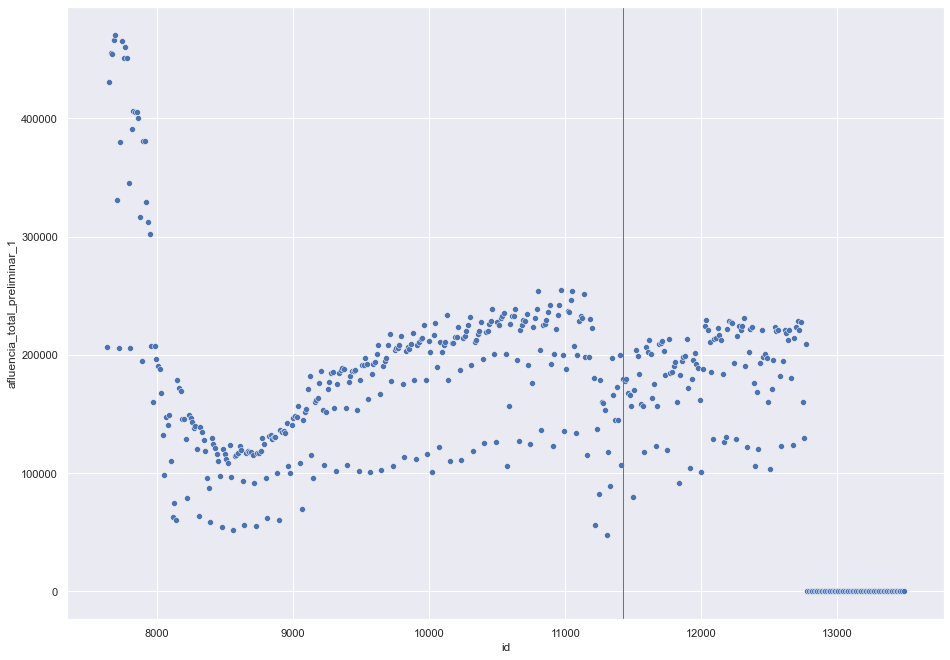

In [436]:
in_linea_12 = df['linea_servicio'] == "L12"
afluencia_STC_linea_12 = afluencia_STC[in_linea_12]
afluencia_STC_linea_12.columns
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_12, x="id", y="afluencia_total_preliminar_1")
plt.axvline(11426, 0,1,c="r", linewidth="1")